In [1]:
import os
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("example") \
    .getOrCreate()


23/12/06 18:22:47 WARN Utils: Your hostname, alvaro-ThinkPad-X1-Carbon-Gen-10 resolves to a loopback address: 127.0.1.1; using 192.168.1.130 instead (on interface wlp0s20f3)
23/12/06 18:22:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/06 18:22:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=example>

# Data info
[link](https://dumps.wikimedia.org/other/pagecounts-raw/)

In [3]:
path = "file://" + os.getcwd() + "/ds/pagecounts-20100806-030000"


In [4]:

bookRDD = sc.textFile(path)

In [5]:
sample = bookRDD.take(10)

In [6]:
sample

['aa.b Main_Page 1 4881',
 'aa.b Special:Contributions/Beau 1 4938',
 'aa.b Special:WhatLinksHere/MediaWiki:Makesysopsubmit 1 4550',
 'aa.b User:Ahoerstemeier 1 4388',
 'aa.b User:Monobi 1 5500',
 'aa.d Special:Contributions/Les_Meloures 1 4949',
 'aa %D0%90%D1%80%D0%B3%D0%B0%D0%B7%D0%BC 1 655',
 'aa Amiga_600 1 655',
 'aa DJ_Dlee 1 653',
 'aa Main_Page 2 9494']

In [7]:
number_of_lines = bookRDD.count()
number_of_lines

4729148

In [8]:
enPages = bookRDD.filter(lambda x: x.startswith("en "))

In [9]:
enPages.count()

2245124

In [10]:
enPages.take(10)

['en ! 13 307446',
 'en !! 2 14565',
 'en !!! 23 356424',
 'en !!!Fuck_You!!! 6 58373',
 'en !!!Fuck_You!!!_and_Then_Some 1 10185',
 'en !!!_(album) 4 29794',
 'en !!Destroy-Oh-Boy!! 1 38670',
 'en !%3D 2 14116',
 'en !5_The_Blood 1 6176',
 'en !Action_Pact! 2 18003']

In [11]:
enPagesTuples = enPages.map(lambda x: tuple(x.split()))
enPagesTuples = enPagesTuples.map(lambda tupla: (tupla[0], tupla[1], int(tupla[2]), int(tupla[3])))

In [12]:
enPagesTuples.count()

2245124

In [13]:
enPagesTuplesSorted = enPagesTuples.sortBy(lambda x: x[3], ascending=False)

In [14]:
enPagesTuplesSorted.take(5)

[('en', 'Main_Page', 222302, 5025224410),
 ('en', 'United_States', 4694, 2160246570),
 ('en', 'United_Kingdom', 2164, 1138630820),
 ('en', 'Canada', 1753, 688248121),
 ('en', 'England', 1401, 626431448)]

In [15]:
enPagesTuples.max(key=lambda x: x[2])

('en', 'Special:Random', 405305, 218224631)

In [25]:
pageVisits = enPagesTuples.map(lambda x: x[2])

# Calculate the histogram with 20 bins
histogram_data = pageVisits.histogram(buckets=20)


In [26]:
histogram_data

([1.0,
  20266.2,
  40531.4,
  60796.600000000006,
  81061.8,
  101327.0,
  121592.20000000001,
  141857.4,
  162122.6,
  182387.80000000002,
  202653.0,
  222918.2,
  243183.40000000002,
  263448.60000000003,
  283713.8,
  303979.0,
  324244.2,
  344509.4,
  364774.60000000003,
  385039.8,
  405305],
 [2245119, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1])

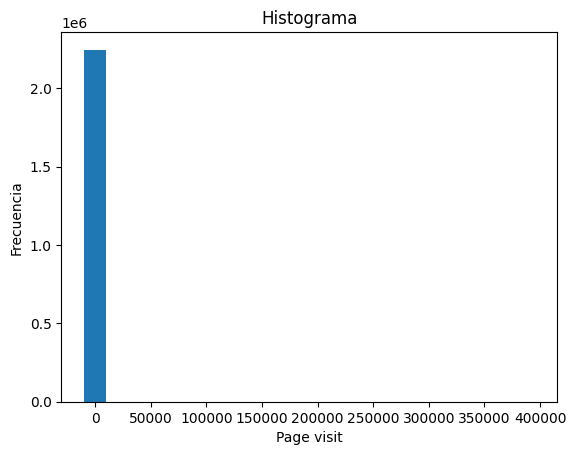

In [28]:
import matplotlib.pyplot as plt

# Extrae los valores del histograma
bins = histogram_data[0]
frequencies = histogram_data[1]

# Visualiza el histograma utilizando matplotlib
plt.bar(bins[:-1], frequencies, width=bins[1]-bins[0])
plt.xlabel("Page visit")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

In [ ]:
spark.stop

<bound method SparkSession.stop of <pyspark.sql.session.SparkSession object at 0x7f5fd464c280>>